## Alucar - Analisando as Vendas

### Objetivo
Analisar se houve crescimento das vendas

#### Tendência das Vendas

#### Bibliotecas utilizadas

In [1]:
import pandas as pd
from pandas.plotting import autocorrelation_plot
import seaborn as sns
sns.set_palette('mako')
sns.set_style('whitegrid')
%matplotlib inline
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
# importando dataset
alucar = pd.read_csv("material curso - Time Series/alucar.csv", sep=',')

#### Funções

In [3]:
# Função para plotar gráfico de linhas padronizado individual
def plotlinha(titulo, labelx, labely, x, y, dataset):
    fig = sns.lineplot(x=x, y=y, data=dataset)
    fig.figure.set_size_inches(12,7)
    fig.set_title(titulo, loc='left', fontsize=18)
    fig.set_xlabel(labelx, fontsize=14)
    fig.set_ylabel(labely, fontsize=14)
    fig = fig # para não aparecer nenhum text 

# Função para plotar 3 gráficos de linhas padronizados - facilita a comparação
def plottrio(titulo, x, y1, y2, y3, dataset):
    plt.figure(figsize=(15,10))
    ax = plt.subplot(3,1,1)
    ax.set_title(titulo, fontsize=18, loc='left')
    sns.lineplot(x=x, y=y1, data=dataset)
    plt.subplot(3,1,2)
    sns.lineplot(x=x, y=y2, data=dataset)
    plt.subplot(3,1,3)
    sns.lineplot(x=x, y=y3, data=dataset)
    ax = ax
    
#

In [4]:
# visualizando os primeiros registros
alucar.head(5)

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [5]:
# tamanho do dataset
print("Quantidade de linhas e colunas: ", alucar.shape)

Quantidade de linhas e colunas:  (24, 2)


In [6]:
# verificando se há dados nulos e os tipos de dados presentes
alucar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   mes     24 non-null     object
 1   vendas  24 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 512.0+ bytes


In [7]:
# convertendo a coluna mês de object para datetime
alucar['mes'] = pd.to_datetime(alucar.mes)
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

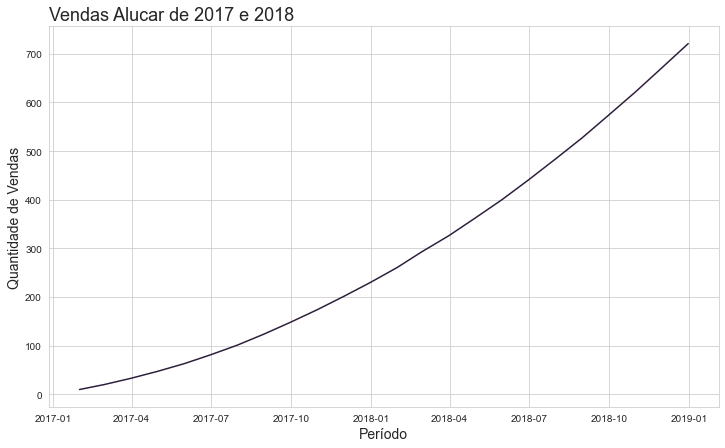

In [8]:
# Gráfico 01: Analisando as Vendas ao longo do periodo
plotlinha('Vendas Alucar de 2017 e 2018', 'Período', 'Quantidade de Vendas',
          'mes', 'vendas', alucar)

Com base no número de vendas x por mês conseguimos visualizar que as vendas aumentaram ao longo do periodo

#### Decompondo as Vendas

Através da decomposição vamos mensurar quanto aumentou de um mês para o outro o número de vendas

In [9]:
# utilizando a função diff que calcula a diferença de um elemento ao outro dentro de um dataframe
alucar['aumento'] = alucar['vendas'].diff()
alucar.head(5)

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


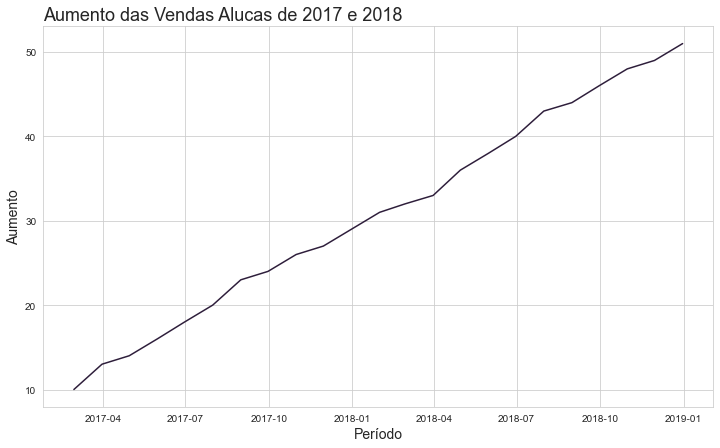

In [10]:
# Gráfico 02: Analisando o Aumento das vendas ao longo do periodo
plotlinha('Aumento das Vendas Alucas de 2017 e 2018', 'Período', 'Aumento',
         'mes', 'aumento', alucar)

Olhando diretamento para o a diferença mês-a-mês, vamos que o aumento seguiu ao longo dos meses

In [11]:
# agora vamos visualizar a aceleração desse aumento
alucar['aceleracao'] = alucar['aumento'].diff()
alucar.head(5)

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


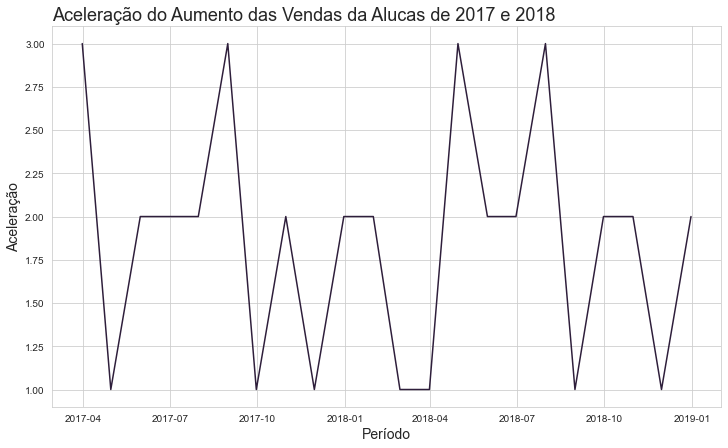

In [12]:
# Gráfico 03: Visualizando a aceleração do aumento das vendas ao longo do tempo
plotlinha('Aceleração do Aumento das Vendas da Alucas de 2017 e 2018', 'Período', 'Aceleração',
         'mes', 'aceleracao', alucar)

A aceleração, embora oscilando entre acima de 1,00 até 3,00, manteve-se positiva

#### Visualização única da decomposição e observando a tendência
Melhorando a visualização para que os três gráficos feitos anteriormente, fiquem juntos

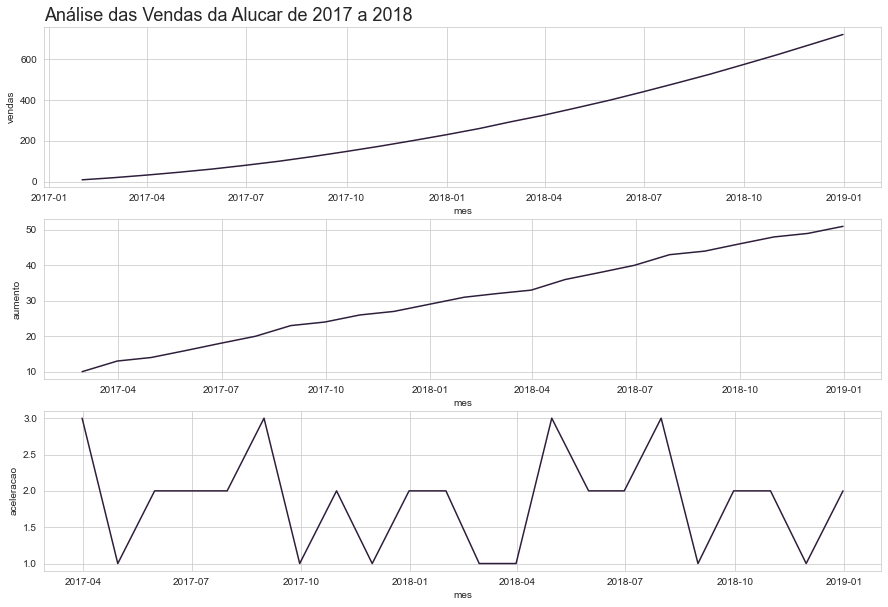

In [13]:
# Gráfico 04: Análise das vendas da Alucas de 2017 a 2018 - Comparando os gráficos
plottrio('Análise das Vendas da Alucar de 2017 a 2018', 
         'mes',
        'vendas', 'aumento', 'aceleracao',
        alucar)

#### Autocorrelação
<b> Nível de correlação </b>: Máximo 1 e Mínima -1<br>
1 = correlação perfeita positiva <br>
0,7 a 0,9 = correlação forte <br>
0,4 a 0,7 = correlação moderada <br>
0,2 a 0,4 = correlação fraca <br>
0 = correlação nula <br>
< 0 = correlação negativa<br>
-1 = correção perfeita negativa

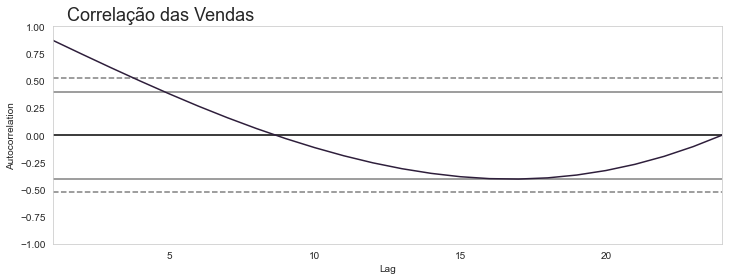

In [14]:
#Gráfico 05: Autocorreção das Vendas
ax = plt.figure(figsize=(12,4))
ax.suptitle('Correlação das Vendas', fontsize=18, x=0.25, y=0.95)
autocorrelation_plot(alucar['vendas'])
ax = ax

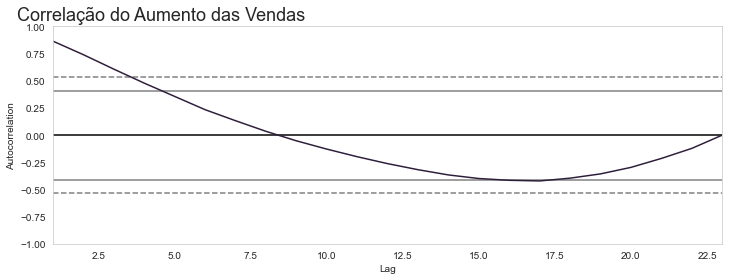

In [15]:
# Gráfico 06: Autocorreção do Aumento
ax = plt.figure(figsize=(12,4))
ax.suptitle('Correlação do Aumento das Vendas', fontsize=18, x=0.25, y=0.95)
autocorrelation_plot(alucar['aumento'][1:]) # como o indice do aumento inicia em 1, passamos esse parametro
ax = ax

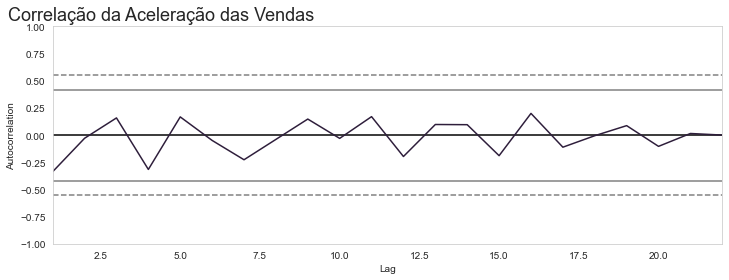

In [16]:
# Gráfico 06: Autocorreção da Aceleração
ax = plt.figure(figsize=(12,4))
ax.suptitle('Correlação da Aceleração das Vendas', fontsize=18, x=0.25, y=0.95)
autocorrelation_plot(alucar['aceleracao'][2:]) # como o indice do aumento inicia em 1, passamos esse parametro
ax = ax

Os 7 primeiros dias parecem ter uma ligação muito forte com as vendas da semana anterior, mas com o passar do tempo essa correção decresce

## Alucar - Analisando assinantes da newsletter
### Objetivo
Analisar número de assinantes e identificar se houve crescimento, estagnação ou diminuição

In [17]:
# importando dataset
assinantes = pd.read_csv("material curso - Time Series/newsletter_alucar.csv")
assinantes.head(5)

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


In [18]:
# tamanho do dataset e dados nulos
print("Quantidade de linhas e colunas: ", assinantes.shape)
print('Quantidade de dados nulos: ', assinantes.isna().sum().sum())

Quantidade de linhas e colunas:  (24, 2)
Quantidade de dados nulos:  0


In [19]:
# convertendo a coluna mês de object para datetime
assinantes['mes'] = pd.to_datetime(assinantes.mes)
assinantes.dtypes

mes           datetime64[ns]
assinantes             int64
dtype: object

### Decompondo as assinaturas

In [20]:
assinantes['aumento'] = assinantes['assinantes'].diff()
assinantes['aceleracao'] = assinantes['aumento'].diff()
assinantes.head(5)

,mes,assinantes,aumento,aceleracao
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0


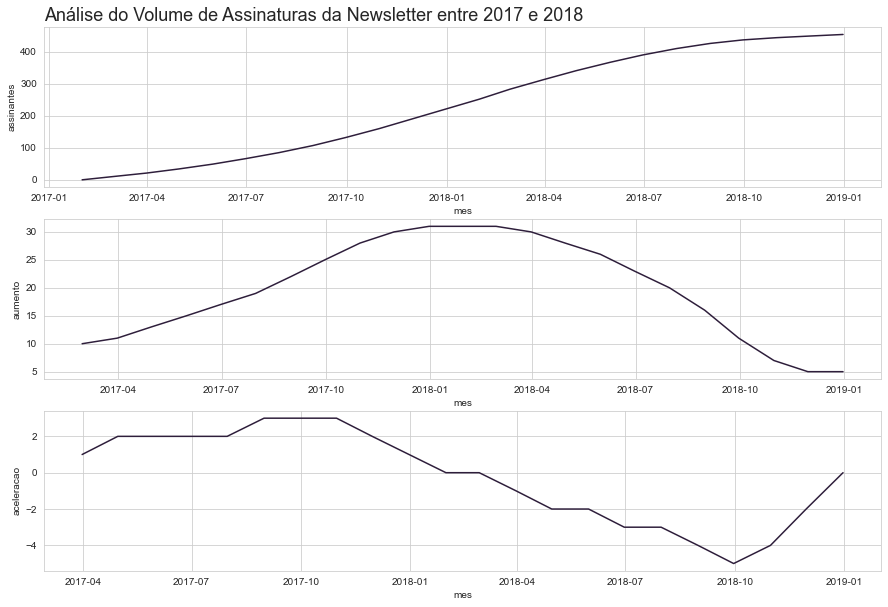

In [21]:
# Gráfico 07: Análise do volume de assinaturas entre 2017 e 2018
plottrio('Análise do Volume de Assinaturas da Newsletter entre 2017 e 2018',
        x = 'mes',
        y1 = 'assinantes', y2 = 'aumento', y3 = 'aceleracao',
        dataset = assinantes)

É possível notar que houve um crescimento expressivo das assinaturas até meados de 2018, mas que estagnou, isso devido a uma desaceleração que impactomou no aumento das assinaturas

## Chocolura - Analisando as vendas
### Objetivo 
Analisar a sazonalidade nas vendas

In [22]:
# importando dataset
chocolura = pd.read_csv("material curso - Time Series/chocolura.csv", sep =',')
chocolura.head(5)

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [23]:
# informações dos dados
chocolura.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   mes     24 non-null     object
 1   vendas  24 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 512.0+ bytes


In [24]:
# convertendo a coluna mês de object para datetime
chocolura['mes'] = pd.to_datetime(chocolura.mes)
chocolura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [25]:
# tamanho do dataset e dados nulos
print("Quantidade de linhas e colunas: ", chocolura.shape)
print('Quantidade de dados nulos: ', chocolura.isna().sum().sum())

Quantidade de linhas e colunas:  (24, 2)
Quantidade de dados nulos:  0


#### Decomposição das vendas

In [26]:
chocolura['aumento'] = chocolura['vendas'].diff()
chocolura['aceleracao'] = chocolura['aumento'].diff()
chocolura.head(5)

,mes,vendas,aumento,aceleracao
0,2017-01-01,210,NaN,NaN
1,2017-02-01,185,-25.0,NaN
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0


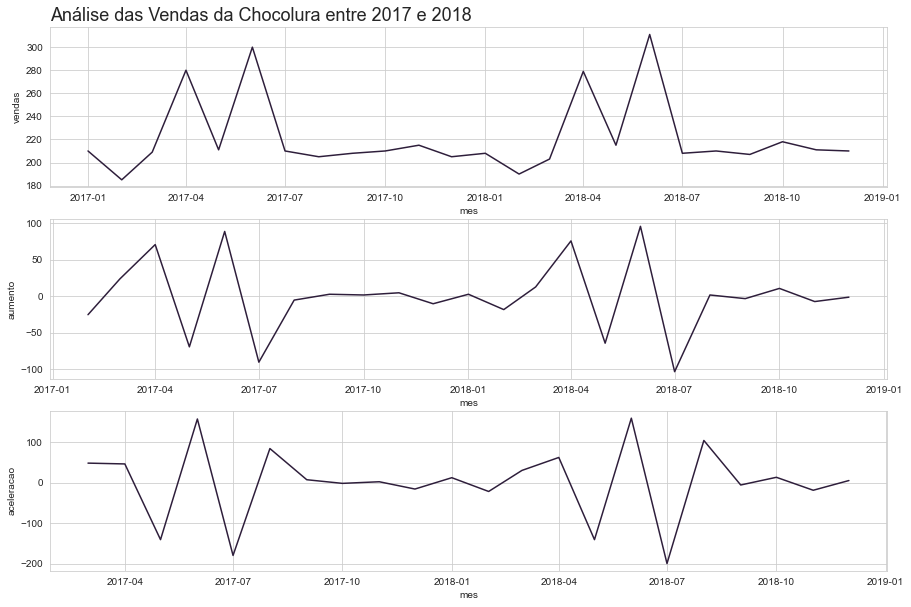

In [27]:
# Gráfico 08: Analise das vendas da chocolura entre 2017 e 2018
plottrio("Análise das Vendas da Chocolura entre 2017 e 2018",
        x = 'mes',
        y1 = 'vendas', y2 = 'aumento', y3 = 'aceleracao',
        dataset = chocolura)

É possível identificar um padrão forte de sazonalidade, onde há uma grande oscilação entre abril e julho e depois um periodo mais estável.
Ela se caracteriza iniciando um crescimento acelerado em Abril, devido a data comemorativa de Páscoa, uma forte queda em Maio, voltando a ter um grande aumento novamente em Junho, devido ao Dia dos Namorado, volta a ter uma queda brusca em Julho e se mantém estável até o próximo período.

## Chocolura - Analisando as vendas diárias (Outubro e Novembro)
### Objetivo 
Analisar as vendas diárias de uma das lojas

In [28]:
# importando dataset
vendas_dia = pd.read_csv("material curso - Time Series/vendas_por_dia.csv")
vendas_dia.head(5)

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


In [29]:
# informações dataset
vendas_dia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   dia     61 non-null     object
 1   vendas  61 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [30]:
# convertendo a coluna mês de object para datetime
vendas_dia['dia'] = pd.to_datetime(vendas_dia.dia)
vendas_dia.dtypes

dia       datetime64[ns]
vendas             int64
dtype: object

In [31]:
# tamanho do dataset e dados nulos
print("Quantidade de linhas e colunas: ", vendas_dia.shape)
print('Quantidade de dados nulos: ', vendas_dia.isna().sum().sum())

Quantidade de linhas e colunas:  (61, 2)
Quantidade de dados nulos:  0


#### Decomposição das vendas

In [32]:
vendas_dia['aumento'] = vendas_dia['vendas'].diff()
vendas_dia['aceleracao'] = vendas_dia['aumento'].diff()
vendas_dia.head(5)

,dia,vendas,aumento,aceleracao
0,2018-10-01,50,NaN,NaN
1,2018-10-02,48,-2.0,NaN
2,2018-10-03,56,8.0,10.0
3,2018-10-04,50,-6.0,-14.0
4,2018-10-05,51,1.0,7.0


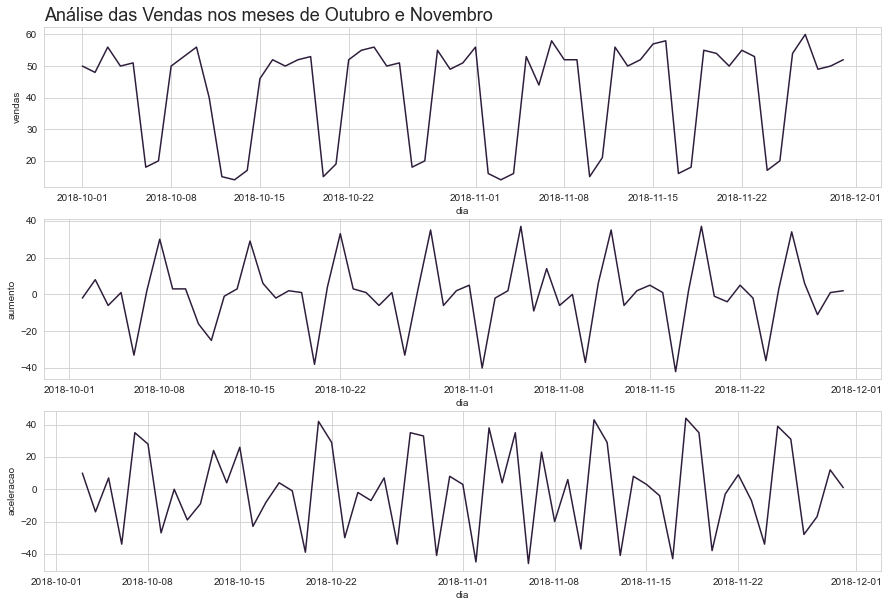

In [33]:
# Gráfico 09: Análise das Vendas da Chocolura nos meses de Outubro e Novembro
plottrio("Análise das Vendas nos meses de Outubro e Novembro",
        x = 'dia',
        y1 = 'vendas', y2 = 'aumento', y3 = 'aceleracao',
        dataset=vendas_dia)

#### Investigando a sazonalidade

In [34]:
# Inserindo coluna com o nome do dia da semana utilizando dt.day_name()
vendas_dia['dia_da_semana'] = vendas_dia['dia'].dt.day_name()
vendas_dia.head(7)

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Monday
1,2018-10-02,48,-2.0,NaN,Tuesday
2,2018-10-03,56,8.0,10.0,Wednesday
3,2018-10-04,50,-6.0,-14.0,Thursday
4,2018-10-05,51,1.0,7.0,Friday
5,2018-10-06,18,-33.0,-34.0,Saturday
6,2018-10-07,20,2.0,35.0,Sunday


In [35]:
# Como os dados estão em português, vamos traduzir o nome dos dias
vendas_dia['dia_da_semana'].unique()
dias = {'Monday': 'Seg', 'Tuesday': 'Ter', 'Wednesday': 'Qua', 'Thursday': 'Qui', 'Friday':'Sex', 'Saturday':'Sab',
       'Sunday': 'Dom'}
vendas_dia['dia_da_semana'] = vendas_dia['dia_da_semana'].map(dias)
vendas_dia.head(7)

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Seg
1,2018-10-02,48,-2.0,NaN,Ter
2,2018-10-03,56,8.0,10.0,Qua
3,2018-10-04,50,-6.0,-14.0,Qui
4,2018-10-05,51,1.0,7.0,Sex
5,2018-10-06,18,-33.0,-34.0,Sab
6,2018-10-07,20,2.0,35.0,Dom


In [36]:
# Entendendo a média das vendas dos dias da semana
vendas_agrupadas = vendas_dia.groupby('dia_da_semana')['vendas', 'aumento', 'aceleracao'].mean().round()
vendas_agrupadas

<ipython-input-36-2d769d17ea36>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  vendas_agrupadas = vendas_dia.groupby('dia_da_semana')['vendas', 'aumento', 'aceleracao'].mean().round()


,vendas,aumento,aceleracao
dia_da_semana,,,
Dom,19.0,3.0,31.0
Qua,53.0,1.0,2.0
Qui,51.0,-2.0,-3.0
Sab,16.0,-28.0,-20.0
Seg,52.0,34.0,31.0
Sex,45.0,-7.0,-5.0
Ter,52.0,-1.0,-34.0


Analisando a sazonalidade, conseguimos observar que nos finais de semana as vendas tem um comportamento de queda e isso pode ser devido a uma regra de negocio (a loja trabalha com redução de funcionamento?)

#### Correlação das Vendas Diárias

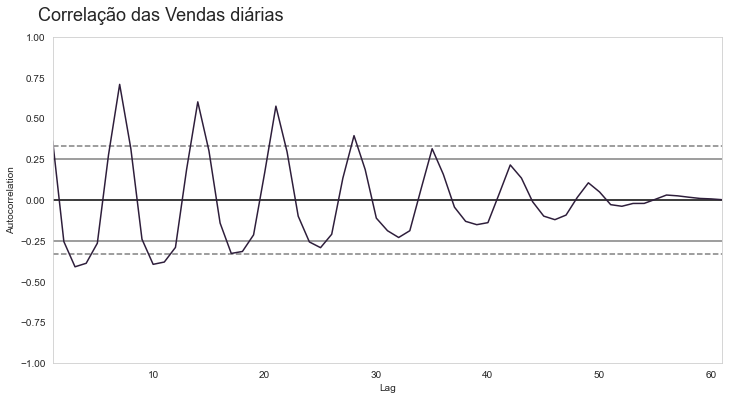

In [37]:
# Gráfico 10: Autocorrelação das Vendas
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das Vendas diárias', fontsize=18, x=0.25, y=0.95)
autocorrelation_plot(vendas_dia['vendas'])
ax = ax

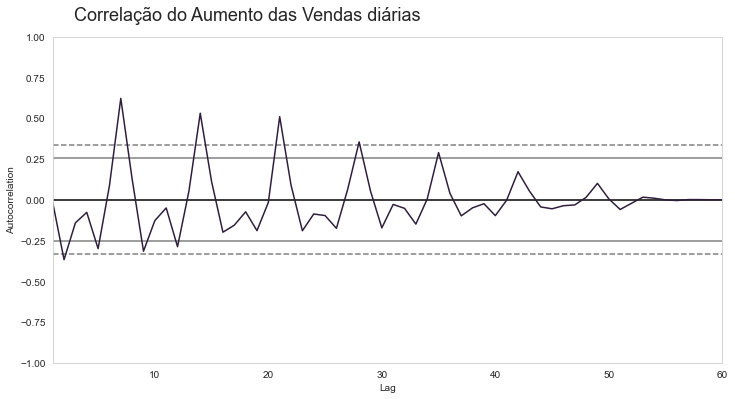

In [38]:
# Gráfico 11: Autocorrelação do Aumento das Vendas
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação do Aumento das Vendas diárias', fontsize=18, x=0.35, y=0.95)
autocorrelation_plot(vendas_dia['aumento'][1:])
ax = ax

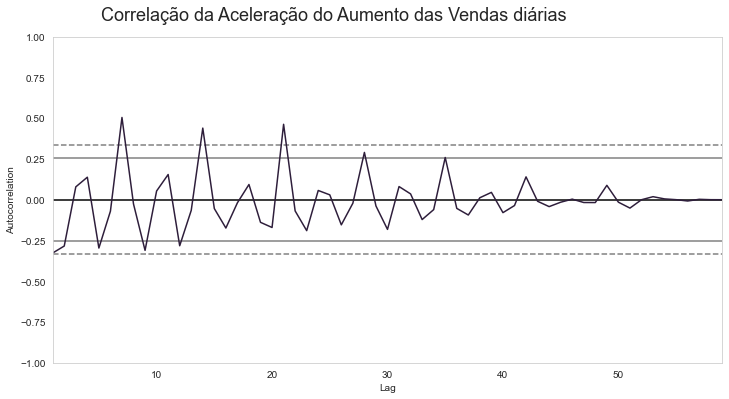

In [39]:
# Gráfico 12: Autocorrelação da Aceleração do Aumento das Vendas
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação da Aceleração do Aumento das Vendas diárias', fontsize=18, x=0.45, y=0.95)
autocorrelation_plot(vendas_dia['aceleracao'][2:])
ax = ax

## Cafelura - Análise das Vendas
### Objetivo 
Analisar as vendas para saber se há ou não crescimento

In [40]:
# importando dataset
cafelura = pd.read_csv("material curso - Time Series/cafelura.csv")
cafelura.head(5)

,mes,vendas
0,2017-01-31,880
1,2017-02-28,1600
2,2017-03-31,3240
3,2017-04-30,3840
4,2017-05-31,5670


In [41]:
# informações de dataset
cafelura.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   mes     24 non-null     object
 1   vendas  24 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 512.0+ bytes


In [42]:
# convertendo a coluna mês de object para datetime
cafelura['mes'] = pd.to_datetime(cafelura.mes)
cafelura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [43]:
# tamanho do dataset e dados nulos
print("Quantidade de linhas e colunas: ", cafelura.shape)
print('Quantidade de dados nulos: ', cafelura.isna().sum().sum())

Quantidade de linhas e colunas:  (24, 2)
Quantidade de dados nulos:  0


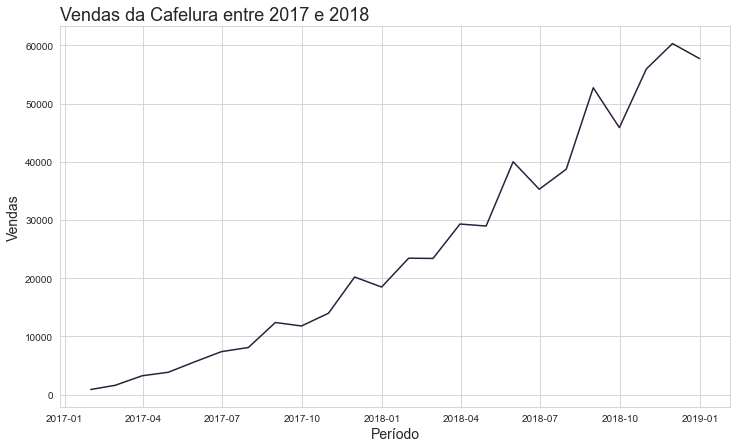

In [44]:
# Gráfico 13: Vendas da Cafelura de 2017 e 2018 
plotlinha('Vendas da Cafelura entre 2017 e 2018', 'Período', 'Vendas', 'mes', 'vendas', cafelura)

#### Normalização da time series

In [45]:
# importando dataset que contem a quantidade de dias de fim de semana no periodo de 2017 a 2018
qtd_dias_fds = pd.read_csv("material curso - Time Series/dias_final_de_semana.csv")
qtd_dias_fds.head()

,quantidade_de_dias
0,8
1,8
2,10
3,8
4,9


In [46]:
qtd = qtd_dias_fds['quantidade_de_dias'].values

In [47]:
# Divindindo o número das vendas pela quantidade de finais de semana
cafelura['vendas_normalizadas'] = cafelura['vendas']/qtd
cafelura.head()

,mes,vendas,vendas_normalizadas
0,2017-01-31,880,110.0
1,2017-02-28,1600,200.0
2,2017-03-31,3240,324.0
3,2017-04-30,3840,480.0
4,2017-05-31,5670,630.0


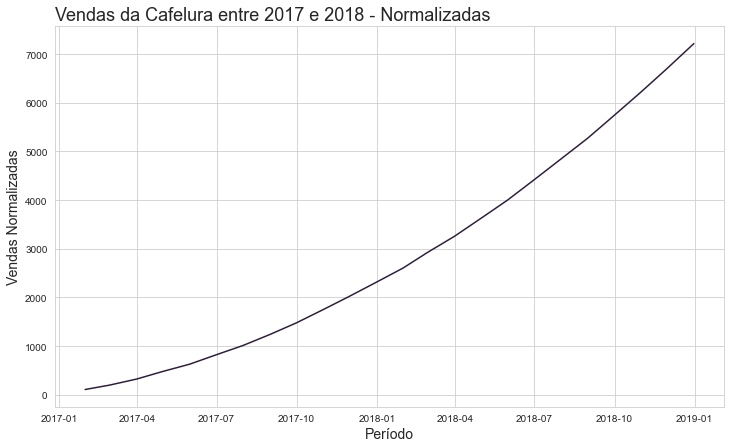

In [48]:
# Gráfico 14: Vendas da Cafelura de 2017 e 2018 - Normalizadas
plotlinha('Vendas da Cafelura entre 2017 e 2018 - Normalizadas', 'Período', 'Vendas Normalizadas', 'mes', 'vendas_normalizadas', cafelura)

<AxesSubplot:title={'center':'Vendas Normalizadas Cafelura 2017 e 2018'}, xlabel='mes', ylabel='vendas_normalizadas'>

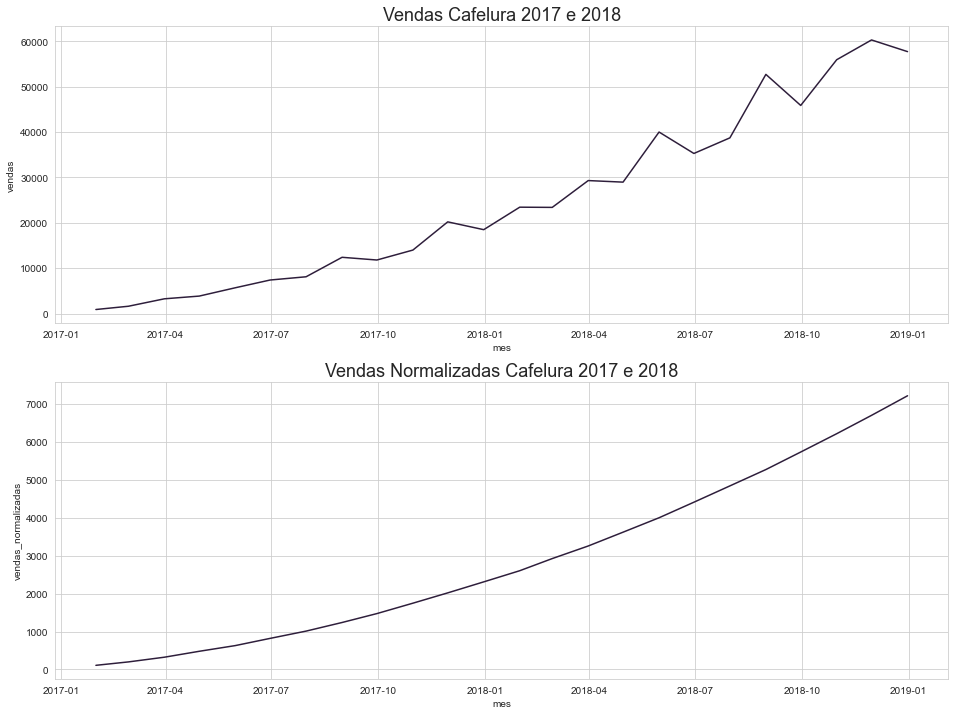

In [49]:
# Gráfico 15
plt.figure(figsize=(16,12))
ax = plt.subplot(2,1,1)
ax.set_title('Vendas Cafelura 2017 e 2018', fontsize=18)
sns.lineplot(x='mes', y='vendas', data=cafelura)
ax = plt.subplot(2,1,2)
ax.set_title('Vendas Normalizadas Cafelura 2017 e 2018', fontsize=18)
sns.lineplot(x='mes', y='vendas_normalizadas', data=cafelura)

#### Statsmodels

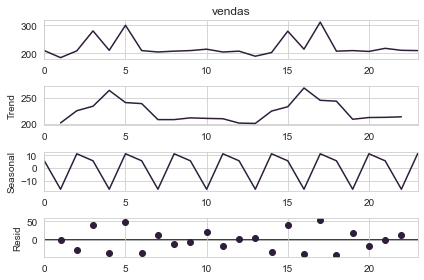

In [50]:
# Gráfico 16
# Utilizando funções da biblioteca statsmodels e para utilizá-la, precisamos passar uma lista
resultado = seasonal_decompose(x=chocolura.vendas, period=3)
ax = resultado.plot()

In [51]:
observacao = resultado.observed
tendencia = resultado.trend
sazonalidade = resultado.seasonal
ruido = resultado.resid

In [52]:
data = ({
    'observacao':observacao,
    'tendencia':tendencia,
    'sazonalidade':sazonalidade,
    'ruido':ruido
})
resultado = pd.DataFrame(data)
resultado.head()

,observacao,tendencia,sazonalidade,ruido
0,210.0,NaN,5.603175,NaN
1,185.0,201.333333,-16.730159,0.396825
2,209.0,224.666667,11.126984,-26.793651
3,280.0,233.333333,5.603175,41.063492
4,211.0,263.666667,-16.730159,-35.936508


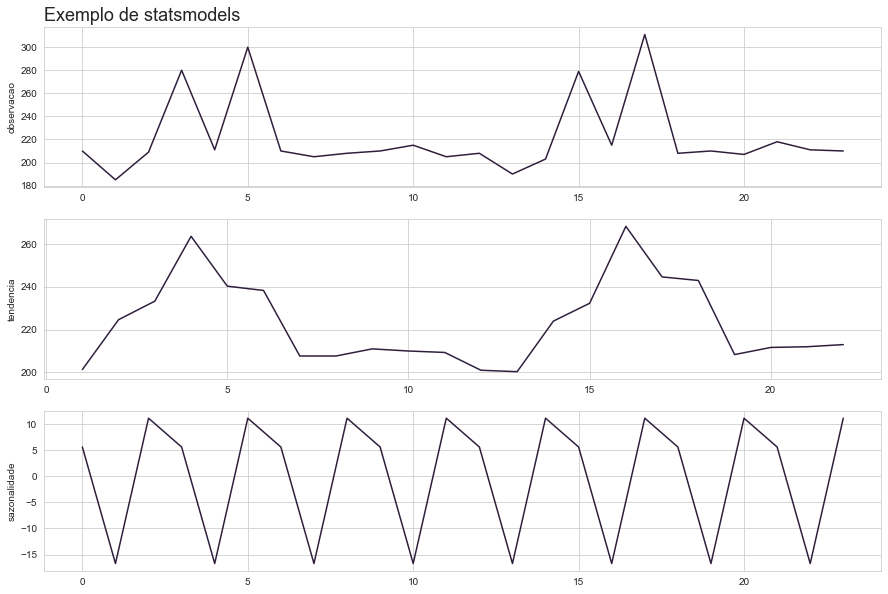

In [53]:
# Gráfico 17
plottrio('Exemplo de statsmodels', resultado.index, 'observacao', 'tendencia', 'sazonalidade', resultado)

## Alucel - Análise das Vendas
### Objetivo 
Analisar as vendas para saber se ha tendência de crescimento ou não

In [54]:
# importando dataset
alucel = pd.read_csv("material curso - Time Series/alucel.csv")
alucel.head(5)

,dia,vendas
0,2018-10-01,1374.83
1,2018-10-02,2185.69
2,2018-10-03,1860.36
3,2018-10-04,1939.02
4,2018-10-05,1946.17


In [55]:
# informações do dataset
alucel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   dia     61 non-null     object 
 1   vendas  61 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.1+ KB


In [56]:
# convertendo a coluna dia de object para datetime
alucel['dia'] = pd.to_datetime(alucel.dia)
alucel.dtypes

dia       datetime64[ns]
vendas           float64
dtype: object

In [57]:
# tamanho do dataset e dados nulos
print("Quantidade de linhas e colunas: ", alucel.shape)
print('Quantidade de dados nulos: ', alucel.isna().sum().sum())

Quantidade de linhas e colunas:  (61, 2)
Quantidade de dados nulos:  0


In [58]:
alucel['aumento'] = alucel['vendas'].diff()
alucel['aceleracao'] = alucel['aumento'].diff()
alucel.head(5)

,dia,vendas,aumento,aceleracao
0,2018-10-01,1374.83,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN
2,2018-10-03,1860.36,-325.33,-1136.19
3,2018-10-04,1939.02,78.66,403.99
4,2018-10-05,1946.17,7.15,-71.51


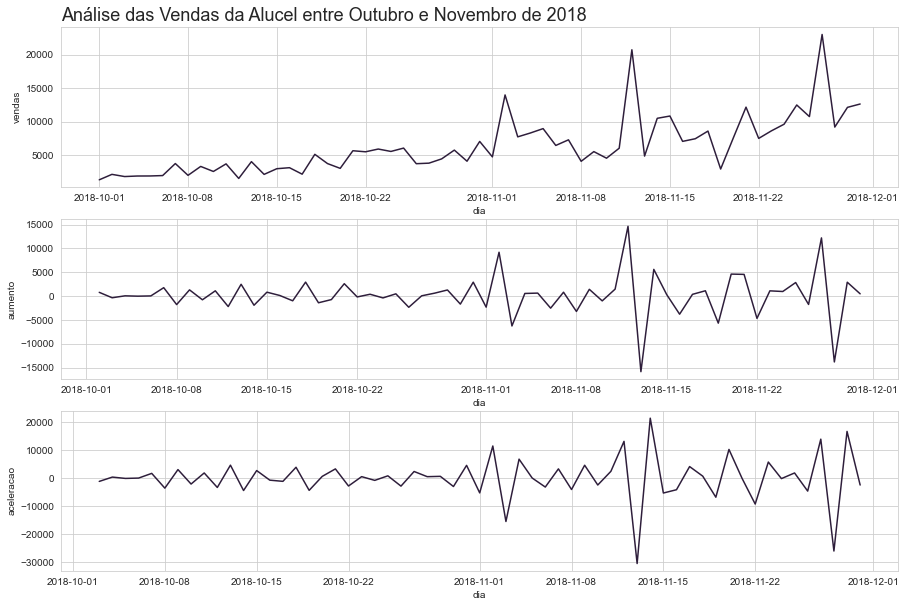

In [59]:
# Gráfico 17
plottrio('Análise das Vendas da Alucel entre Outubro e Novembro de 2018', 
        x='dia',
        y1='vendas', y2='aumento', y3='aceleracao',
        dataset=alucel)

#### Minimizando ruídos: Média Móvel

In [60]:
alucel['media_movel_7d'] = alucel['vendas'].rolling(7).mean().round(2)
alucel['media_movel_14d'] = alucel['vendas'].rolling(14).mean().round(2)
alucel.head(10)

,dia,vendas,aumento,aceleracao,media_movel_7d,media_movel_14d
0,2018-10-01,1374.83,NaN,NaN,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN,NaN,NaN
2,2018-10-03,1860.36,-325.33,-1136.19,NaN,NaN
3,2018-10-04,1939.02,78.66,403.99,NaN,NaN
4,2018-10-05,1946.17,7.15,-71.51,NaN,NaN
5,2018-10-06,2005.89,59.72,52.57,NaN,NaN
6,2018-10-07,3793.07,1787.18,1727.46,2157.86,NaN
7,2018-10-08,2039.59,-1753.48,-3540.66,2252.83,NaN
8,2018-10-09,3365.58,1325.99,3079.47,2421.38,NaN
9,2018-10-10,2616.12,-749.46,-2075.45,2529.35,NaN


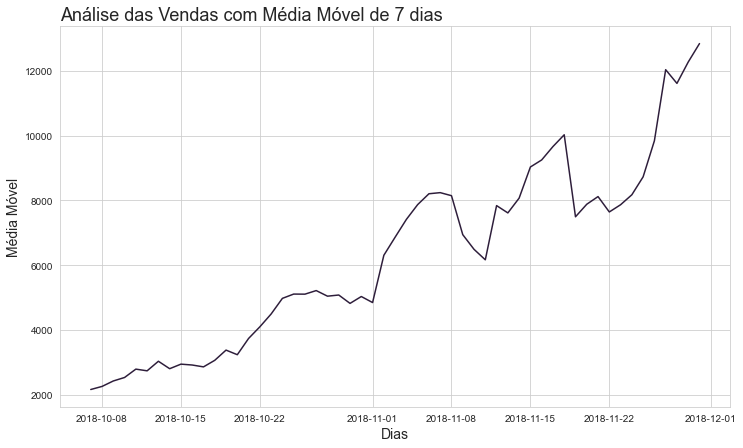

In [61]:
# Gráfico 18: Análise de Vendas com Média Móvel de 7 dias
plotlinha('Análise das Vendas com Média Móvel de 7 dias',
         'Dias', 'Média Móvel', 'dia', 'media_movel_7d',
         alucel)

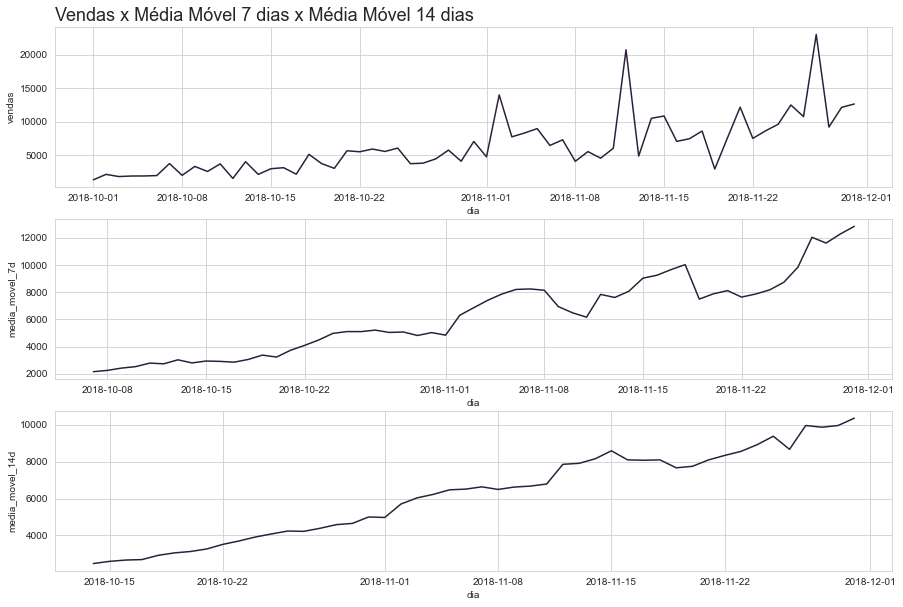

In [63]:
# Gráfico 19: Comparando os dados
plottrio('Vendas x Média Móvel 7 dias x Média Móvel 14 dias',
        x='dia',
        y1='vendas', y2='media_movel_7d', y3='media_movel_14d',
        dataset=alucel)